# Linear Network

In [ ]:
!pip3 install torch 
!pip3 install torchvision
!pip3 install tqdm

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
 
assert torch.cuda.is_available() # You need to request a GPU from Runtime > Change Runtime Type


# Write the boilerplate code from the video here

# Create a dataset class that extends the torch.utils.data Dataset class here
class FashionMNISTProcessedDataset(Dataset):
  def __init__ (self, root, train=True):
    self.data = datasets.FashionMNIST(root, train=train,
                                      transform=transforms.ToTensor(),
                                      download=True)
  def __getitem__(self, i):
    x, y = self.data[i]
    return x, y
  def __len__(self):
    return len(self.data)

# Extend the torch.Module class to create your own neural network
class LinearNetwork(nn.Module):
  def __init__ (self, dataset):
    super(LinearNetwork, self).__init__()
    x, y = dataset[0]
    c, h, w = x.size()
    out_dim = 10

    self.net = nn.Sequential(nn.Linear(c * h * w, 1000),
                             nn.ReLU(),
                             nn.Linear(1000, out_dim)
                             ) 
  def forward(self, x):
    n, c, h, w = x.size()
    flattened = x.view(n, c*h*w)
    return self.net(flattened)

# Instantiate the train and validation sets
train_dataset = FashionMNISTProcessedDataset('/tmp/fashionmnist', train=True)
val_dataset = FashionMNISTProcessedDataset('/tmp/fashionmnist', train=False)

# Instantiate your data loaders
train_loader = DataLoader(train_dataset, batch_size=42, pin_memory=True)
validation_loader = DataLoader(val_dataset, batch_size=42)

# Instantiate your model and loss and optimizer functions
model = LinearNetwork(train_dataset)
model = model.cuda()

optimizer = optim.SGD(model.parameters(), lr=1e-4)
objective = torch.nn.CrossEntropyLoss()

# Run your training / validation loops
cntr = 0
validation_losses = []
train_losses = []
num_epochs = 100
loop = tqdm(total=len(train_loader) * num_epochs, position=0)

for epoch in range(num_epochs):
  batch = 0
  for x, y_truth in train_loader:
    x, y_truth = x.cuda(non_blocking=True), y_truth.cuda(non_blocking=True) # puts it on GPU
    
    optimizer.zero_grad()

    y_hat = model(x) # model is a class, but we are running it as though it were a function
    loss = objective(y_hat, y_truth)

    if epoch % 10 == 0 and batch == 0:
      train_losses.append(loss.item())
      validation_loss_list = []
      for val_x, val_y_truth in validation_loader:
        val_x, val_y_truth = val_x.cuda(non_blocking=True), val_y_truth.cuda(non_blocking=True)
        val_y_hat = model(val_x)
        validation_loss_list.append(objective(val_y_hat, val_y_truth))
      validation_losses.append((sum(validation_loss_list)/float(len(validation_loss_list))).item())

    
    loop.set_description('epoch:{} batch:{} loss:{:.4f} val_loss:{:.4f}'.format(epoch, batch, loss.item(), validation_losses[-1]))

    loss.backward()
    optimizer.step()
    batch += 1

loop.close()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to /tmp/fashionmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /tmp/fashionmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/fashionmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/fashionmnist/FashionMNIST/raw



epoch:99 batch:1428 loss:0.6595 val_loss:0.6523:   0%|          | 0/142900 [27:59<?, ?it/s]


In [ ]:
train_dataset = FashionMNISTProcessedDataset('/tmp/fashionmnist', train=True)
val_dataset = FashionMNISTProcessedDataset('/tmp/fashionmnist', train=False)
model = LinearNetwork(train_dataset)
model = model.cuda()
train_loader = DataLoader(train_dataset, batch_size=42, pin_memory=True)
validation_loader = DataLoader(val_dataset, batch_size=42)

optimizer = optim.SGD(model.parameters(), lr=1e-4)
objective = torch.nn.CrossEntropyLoss()

cntr = 0
validation_losses = []
train_losses = []
num_epochs = 100
loop = tqdm(total=len(train_loader) * num_epochs, position=0)



for epoch in range(num_epochs):
  batch = 0
  for x, y_truth in train_loader:
    x, y_truth = x.cuda(non_blocking=True), y_truth.cuda(non_blocking=True) # puts it on GPU
    
    optimizer.zero_grad()

    y_hat = model(x) # model is a class, but we are running it as though it were a function
    loss = objective(y_hat, y_truth)

    if epoch % 10 == 0 and batch == 0:
      train_losses.append(loss.item())
      validation_loss_list = []
      for val_x, val_y_truth in validation_loader:
        val_x, val_y_truth = val_x.cuda(non_blocking=True), val_y_truth.cuda(non_blocking=True)
        val_y_hat = model(val_x)
        validation_loss_list.append(objective(val_y_hat, val_y_truth))
      validation_losses.append((sum(validation_loss_list)/float(len(validation_loss_list))).item())

    
    loop.set_description('epoch:{} batch:{} loss:{:.4f} val_loss:{:.4f}'.format(epoch, batch, loss.item(), validation_losses[-1]))

    loss.backward()
    optimizer.step()
    batch += 1

loop.close()

In [ ]:
class LinearNetwork(nn.Module):
  def __init__ (self, dataset):
    super(LinearNetwork, self).__init__()
    x, y = dataset[0]
    c, h, w = x.size()
    out_dim = 10

    self.net = nn.Sequential(nn.Linear(c * h * w, 1000),
                             nn.ReLU(),
                             nn.Linear(1000, out_dim)
                             ) 
  
  def forward(self, x):
    n, c, h, w = x.size()
    flattened = x.view(n, c*h*w)
    return self.net(flattened)

class FashionMNISTProcessedDataset(Dataset):
  def __init__ (self, root, train=True):
    self.data = datasets.FashionMNIST(root, train=train,
                                      transform=transforms.ToTensor(),
                                      download=True)
  
  def __getitem__(self, i):
    x, y = self.data[i]
    return x, y
  
  def __len__(self):
    return len(self.data)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(validation_losses), validation_losses, label='Validation Loss'))
ax.plot(range(len(train_losses), train_losses, label='Train Loss'))
plt.legend()
plt.show()

### Visualization of Val vs Train Loss


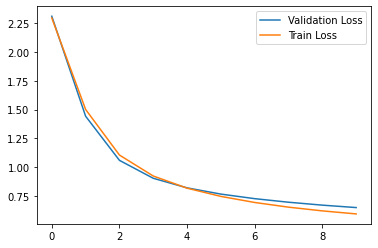

In [ ]:
# Write your code to create a plot of your loss over time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(validation_losses)), validation_losses, label='Validation Loss')
ax.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.legend()
plt.show()